In this notebook, I will be examining an income dataset of adults in US. There are 14 features for each individual with a target column income. Income column has two values <=50K and >50K. First of all, I will do an explororaty analysis for some features in this dataset and try to answer the questions below:

   1. What is the relationship between income and age?
   2. What is the relationship between income and work hours?
   3. What is the relationship between income and work class?
   4. What is the relationship between income and education?
   5. What is the relationship between income and race?
   6. What is the relationship between income and gender?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


***Age Distribution:***

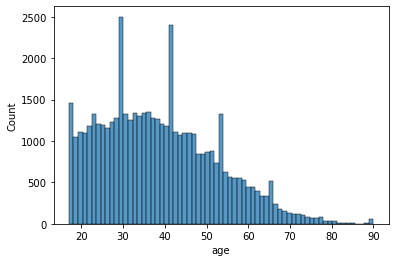

In [5]:
sns.histplot(data=df, x= 'age')
plt.show()

- Age distribution is right-skewed, and this is expected outcome

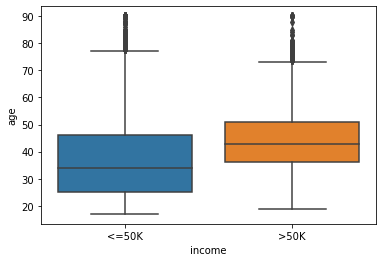

In [6]:
sns.boxplot(data=df, x='income', y='age')
plt.show()

- The average age is lower for people who earn income less than 50K than the people who earn income more than 50K.

***Work Hours vs Income***

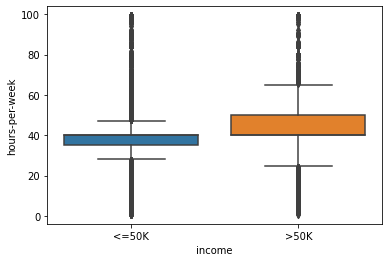

In [7]:
sns.boxplot(data=df, y='hours-per-week',x='income')
plt.show()

- The average number of workhours is lower for people who earn income less than 50K than the people who earn income more than 50K.

In [8]:
# creating a function to plot the number of column values with respect to income 
# and ratio of high earners (>50k) with respect to column value
def high_earner_ratio(dataframe,column,hue=None):
    df = dataframe[[column,'income','age']].groupby([column,'income']).count().reset_index()
    df = df.pivot_table(columns='income',index= column).reset_index()
    df.columns = [column,'less50K','more50K']
    df['%more50K'] = (100*df['more50K']/(df['more50K']+df['less50K']))
    
    plt.figure(figsize=(25,10))
    plt.subplot(1, 2, 1)
    sns.countplot(data=dataframe, y=column,hue=hue)
    plt.subplot(1, 2, 2)
    sns.barplot(data=df, y=column, x='%more50K', orient='h')
    plt.show()

***Workclass vs Income***

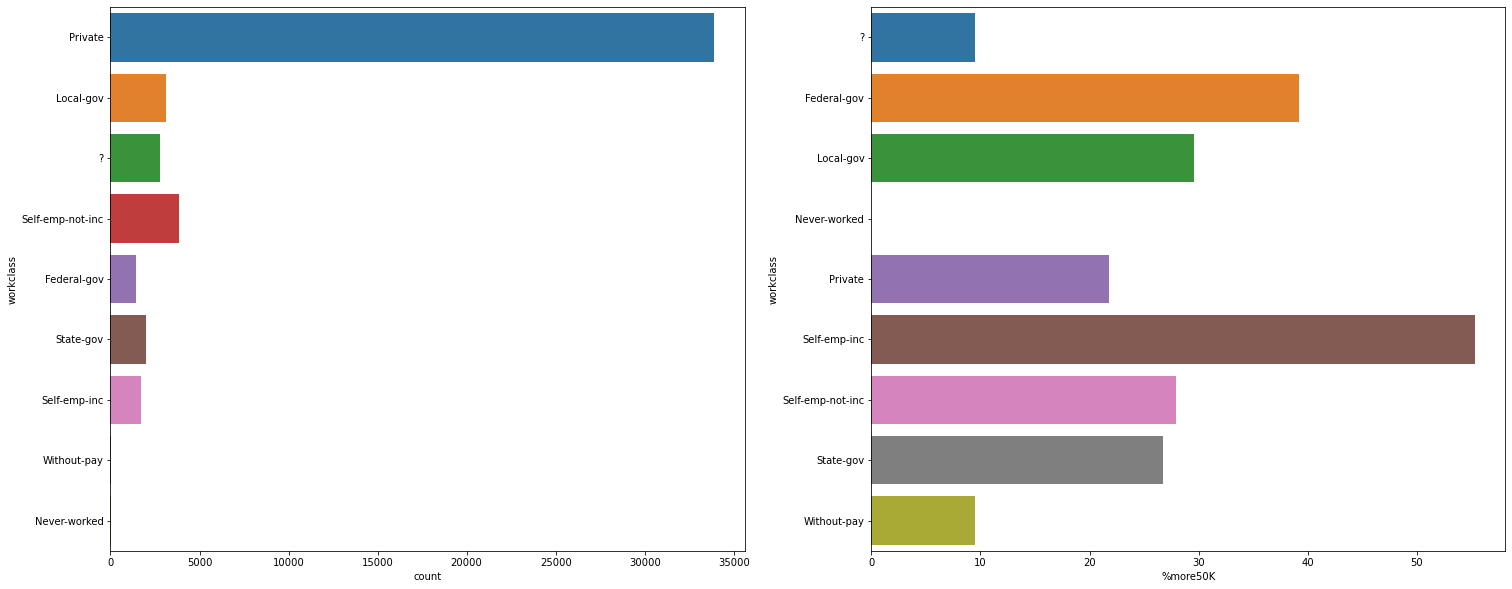

In [9]:
high_earner_ratio(df,'workclass')

- Private sector has the largest number of employees among other work classes.

- The ratio of people making more than 50K is highest among the self-employed followed by the Federal employees.

***Education vs Income***

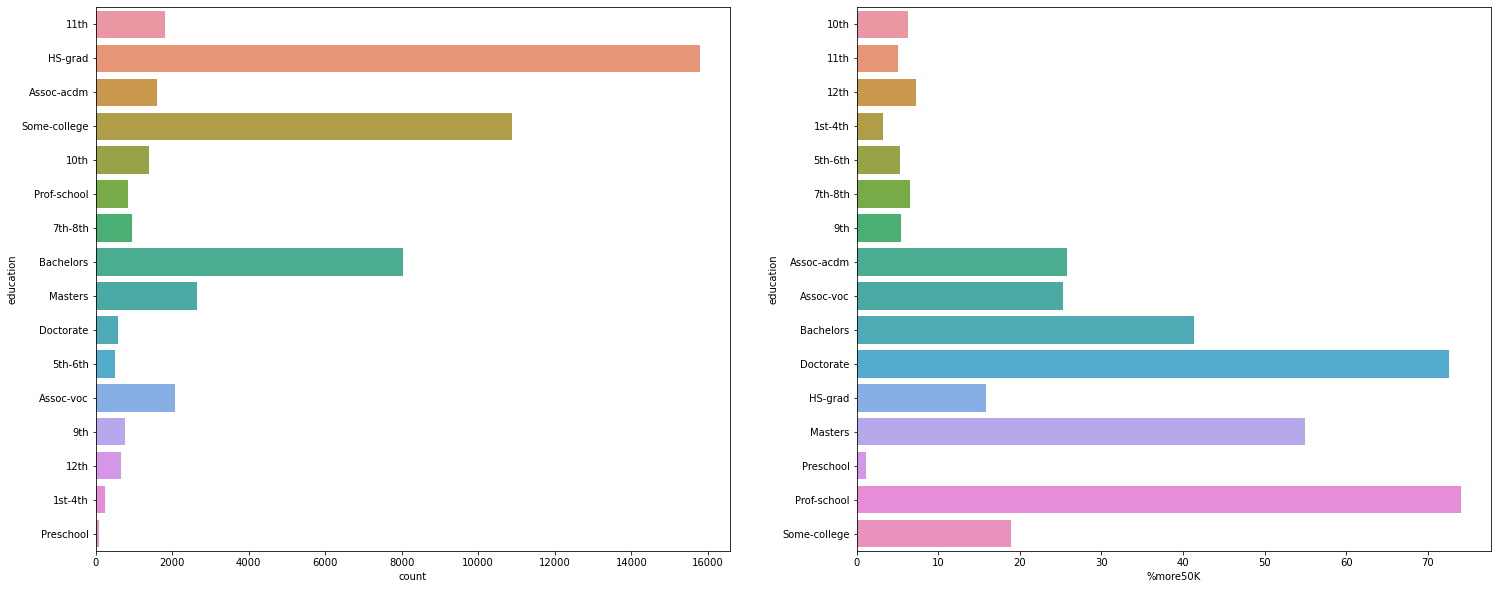

In [10]:
high_earner_ratio(df,'education')

- People in this dataset mostly have high-school degree followed by some-college classes and bachelor degree. 

- People with degrees from professional schools has the highest ratio of earning more than 50K followed by the ones with doctorate degree, and masters degree.

***Race vs Income***

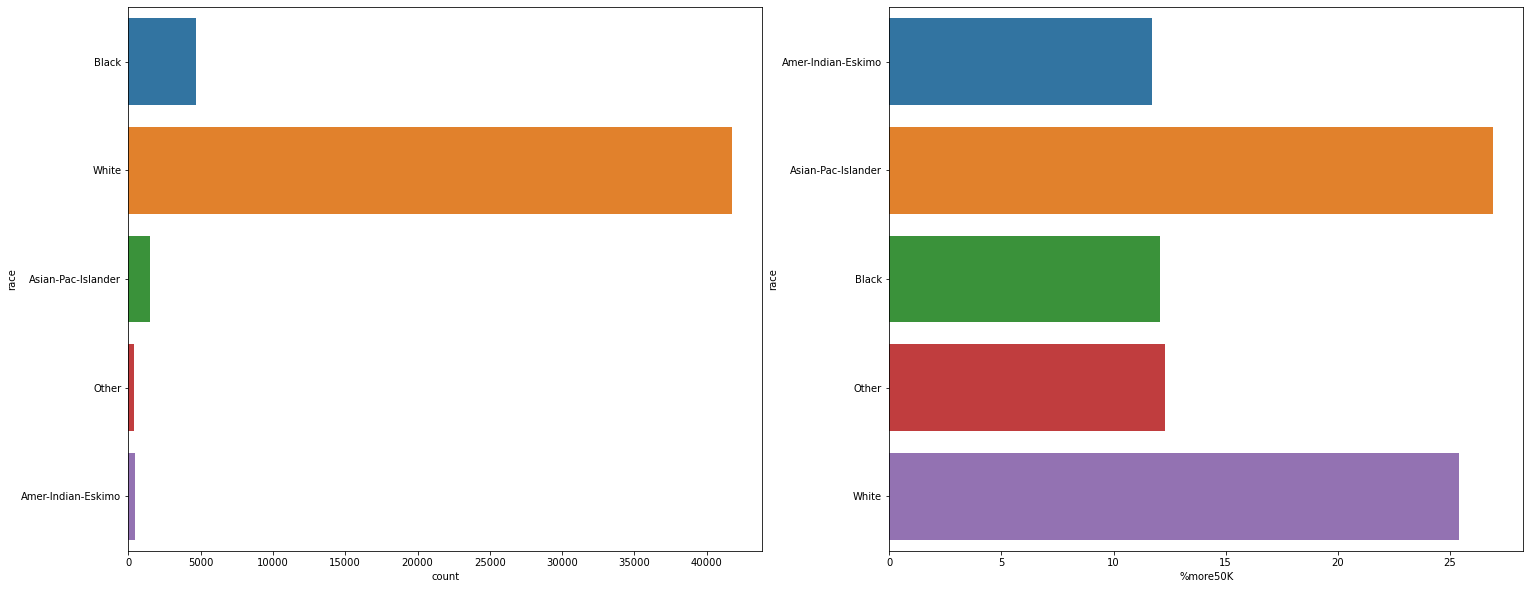

In [11]:
high_earner_ratio(df,'race')

- White people are the largest population within this dataset, followed by Black and Asian-Pacific-Islanders.

- Asian-Pacific-Islanders have the highest ratio of earning more than 50k followed by Whites. 

***Gender vs Income***

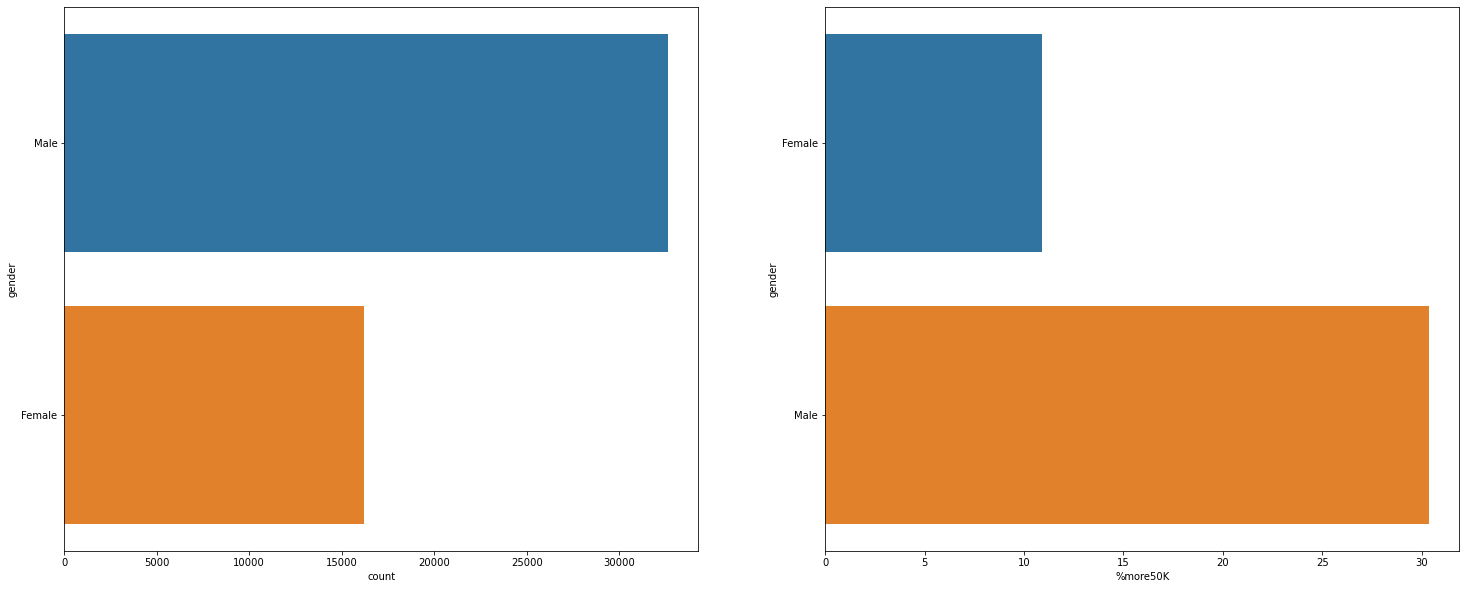

In [12]:
high_earner_ratio(df,'gender')

- There are more males in this dataset and the ratio of high earners (>50K) is more for males than females.